# Using the data

We will assume that a populated database is available from which to process the data. The database should contain the AA sequences around the phosphosite (+/- 7AAs) so that comparisons can be done. Also fold change information would be useful.

First let's grab what's needed from the database:

In [1]:
import sqlite3
from Class import Phosphosite

conn = sqlite3.connect("/home/socall/projects/phosphorylation2/Model/phospho-db.sqlite")
db_cursor = conn.cursor()

db_cursor.execute('SELECT rowid, residue, position, genename, AA_sequence, uniprotid, foldchange FROM phosphositetb;')
rows = db_cursor.fetchall()

phosphosites = []
#print rows
print "   resid pos   genename foldchange" 
for row in rows:
    rowid = row[0]
    residue = row[1]
    position = row[2]
    genename = row[3]
    AA_sequence = row[4]
    uniprotid = row[5]
    foldchange = row[6]
       
    print '{:4d}: {} {:4d}'.format(rowid,residue,position), u"{:>10s}".format(genename), foldchange
    
    phosphosite = Phosphosite(residue, position, uniprotid, foldchange)
    phosphosite.set_AA_sequence(AA_sequence)
    phosphosite.set_genename(genename)
    phosphosites.append(phosphosite)
    
    

   resid pos   genename foldchange
   1: S  789    MAP3K11 100.0
   2: S  793    MAP3K11 100.0
   3: S  470     PHLDB1 100.0
   4: S 1862      NUMA1 100.0
   5: S  283    RETREG2 100.0
   6: S  291    RETREG2 100.0
   7: S    9      PSMC3 100.0
   8: S 1259      PDS5B 100.0
   9: S    0      SRRM2 100.0
  10: Y    0      CPT1B 100.0
  11: S  256       PPIG 100.0
  12: S  257       PPIG 100.0
  13: S    0       PPIG 100.0
  14: S  982    PLEKHG5 100.0
  15: S  191     MAGED2 100.0
  16: S  194     MAGED2 100.0
  17: S  197     MAGED2 100.0
  18: S  307      POLD3 100.0
  19: S  681      CDK12 100.0
  20: S  314     PTPN14 100.0
  21: S 1620      SRRM2 18.397
  22: S 1621      SRRM2 18.397
  23: S    0      SRRM2 18.397
  24: S  212     NUFIP2 16.028
  25: S  214     NUFIP2 16.028
  26: S  298       PURB 8.591
  27: S  304       PURB 8.591
  28: S  304       PURB 7.239
  29: S  132       PKP2 6.863
  30: S  135       PKP2 6.863
  31: S  165       YBX1 6.003
  32: S  167       YBX1 6.003


 996: T  108      ABCF1 1.151
 997: S  109      ABCF1 1.151
 998: S  390       LMNA 1.151
 999: S  403      FCHO2 1.15
1000: S  179    PROSER2 1.15
1001: S   15       RTN4 1.149
1002: S  309       USF1 1.149
1003: S  914     SPECC1 1.149
1004: S  917     SPECC1 1.149
1005: S  349      BAZ1B 1.149
1006: S  428     PNPLA2 1.147
1007: S  459        BCR 1.147
1008: S  394       GIT1 1.146
1009: S  397       GIT1 1.146
1010: S  773   RALGAPA1 1.145
1011: S  512     BCLAF1 1.145
1012: S  438       IWS1 1.144
1013: S  440       IWS1 1.144
1014: S  201       TJP2 1.143
1015: S 1738       HELZ 1.141
1016: S 1741       HELZ 1.141
1017: S 1696    ANKRD17 1.14
1018: T  266     AKT1S1 1.14
1019: S  857      PTPRK 1.14
1020: T  861      PTPRK 1.14
1021: S  457    IRF2BP2 1.14
1022: S  198     ZC3H13 1.139
1023: S 1475      SCRIB 1.139
1024: S  174       YBX1 1.139
1025: S  837      ACIN1 1.138
1026: S  332     HIRIP3 1.138
1027: S  333     HIRIP3 1.138
1028: S  929     GAPVD1 1.138
1029: S   94     

1908: S  668     PPFIA1 1.002
1909: S  443       BZW1 1.002
1910: S  887        PPL 1.002
1911: S    0   ARHGAP35 1.002
1912: S  768    LRRFIP1 1.002
1913: T  315       CCNH 1.002
1914: S  322       CCNH 1.002
1915: S 1907      HUWE1 1.001
1916: S  659    IRF2BPL 1.001
1917: S   70      WDR13 1.001
1918: S   74      WDR13 1.001
1919: S    0       PPA2 1.001
1920: S  141     MAP3K8 1.001
1921: S  182   ARHGAP27 1.001
1922: S  182      GINS2 1.001
1923: S  398    STK11IP 1.001
1924: S   85    COL17A1 1.0
1925: S   93    COL17A1 1.0
1926: S  630       LEO1 1.0
1927: S 1933     AKAP13 1.0
1928: S   82      HSPB1 1.0
1929: S    0    OSBPL10 1.0
1930: S 1101    CAMSAP3 1.0
1931: S   28       SMN2 0.999
1932: S   31       SMN2 0.999
1933: S   25      HBS1L 0.999
1934: S   33      HBS1L 0.999
1935: S  636     DPYSL3 0.999
1936: S  156      TCOF1 0.999
1937: S  521       CBLB 0.999
1938: S  525       CBLB 0.999
1939: S   72      EEF2K 0.998
1940: S   74      EEF2K 0.998
1941: S    6     TVP23C 

2996: S  232     AKT1S1 0.891
2997: S  520       RTKN 0.891
2998: S  529       RTKN 0.891
2999: T  174       TLK2 0.891
3000: S  387     ZNF574 0.891
3001: S  119      RPAP3 0.891
3002: S  121      RPAP3 0.891
3003: S  366     MAP7D1 0.891
3004: T 1209       PATJ 0.891
3005: S 1212       PATJ 0.891
3006: S  188       GPHN 0.891
3007: S  194       GPHN 0.891
3008: S  296       PDCL 0.891
3009: S 1167      RREB1 0.89
3010: S   67       TMPO 0.89
3011: S  394       MISP 0.89
3012: S  698     ZNF318 0.89
3013: S  135       RALY 0.89
3014: S  474    RBBP8NL 0.89
3015: S  641     CTNNA1 0.89
3016: T  645     CTNNA1 0.89
3017: S  763      MINK1 0.89
3018: S  595    PPFIBP1 0.89
3019: S  397     BCLAF1 0.889
3020: S  171       KRI1 0.889
3021: S  696      SRRM1 0.889
3022: S  272    TMEM45B 0.889
3023: S  837      PARD3 0.889
3024: S  840      PARD3 0.889
3025: T 1051       MED1 0.889
3026: S 1941       FRYL 0.889
3027: S   77     ARID3A 0.889
3028: S   81     ARID3A 0.889
3029: S  510       G

4163: S    0    DENND4B 0.764
4164: S  458      RRP1B 0.764
4165: S  183       ABI1 0.763
4166: S    0     NUP153 0.763
4167: S  421     EPS8L3 0.763
4168: S  130      VDAC2 0.763
4169: T  869     CTNND1 0.762
4170: S 1271     KIF21A 0.762
4171: S  790     ARID4B 0.762
4172: T  793     ARID4B 0.762
4173: S  398     CSNK1D 0.762
4174: S  401     CSNK1D 0.762
4175: S  573    PPFIBP1 0.761
4176: S 1330     NCAPD2 0.761
4177: S 1333     NCAPD2 0.761
4178: S  182     PRKAB1 0.761
4179: S  605     UBAP2L 0.761
4180: S  456     PRRC2A 0.761
4181: S  925      ABCC1 0.761
4182: S  106       DDI2 0.761
4183: S  706   ARHGAP32 0.76
4184: S  709   ARHGAP32 0.76
4185: S   28      DNPH1 0.76
4186: S  331      NDRG3 0.76
4187: S  334      NDRG3 0.76
4188: S 1391     KIF13B 0.76
4189: S 1257    EHBP1L1 0.76
4190: S  165     GTF3C2 0.759
4191: S  167     GTF3C2 0.759
4192: S  178       PUM2 0.759
4193: S  182       PUM2 0.759
4194: S 1064      SRRM2 0.759
4195: S 1069      SRRM2 0.759
4196: S 1073     

5380: S  280     NFATC4 1.94
5381: S  106        PXN 1.914
5382: S  182       EPN2 1.911
5383: S  192       EPN2 1.911
5384: S  195       EPN2 1.911
5385: S  297       MBD1 1.894
5386: S   50     TRIM28 1.892
5387: S   63       GRB7 1.863
5388: S   76       GRB7 1.863
5389: S   35      KRT19 1.855
5390: S   82       PKP2 1.849
5391: S 1789      DOCK5 1.841
5392: S  499       XRN2 1.839
5393: S  501       XRN2 1.839
5394: S  138       PKP3 1.827
5395: S  104       RRP8 1.825
5396: S  106       RRP8 1.825
5397: T  204      UTP18 1.824
5398: S  205      UTP18 1.824
5399: S  210      UTP18 1.824
5400: S  898      DOCK7 1.817
5401: S   45     NUP133 1.797
5402: S    0     NUP133 1.797
5403: T  185      MAPK1 1.797
5404: Y  187      MAPK1 1.797
5405: S   37    FAM122A 1.793
5406: S  973      NCAPG 1.792
5407: S  975      NCAPG 1.792
5408: S  261       IWS1 1.783
5409: S  263       IWS1 1.783
5410: S   22        DSP 1.778
5411: S  687   TBC1D10B 1.774
5412: S  329       PKP2 1.763
5413: S  24

6585: S    0       RBL2 1.086
6586: S  502       TNK1 1.086
6587: S  519       TNK1 1.086
6588: S  178     LSM14A 1.086
6589: S  928       MAP4 1.086
6590: S  883        XPC 1.086
6591: S  884        XPC 1.086
6592: S  794      DCAF5 1.085
6593: T  886      PLCB4 1.085
6594: S 1322    TP53BP1 1.085
6595: S 1325    TP53BP1 1.085
6596: S  652      MRE11 1.084
6597: S 1045       IBTK 1.084
6598: T 1599       MAP2 1.084
6599: T 1602       MAP2 1.084
6600: T 1605       MAP2 1.084
6601: S  241      PLIN3 1.084
6602: S  708   TRAPPC10 1.084
6603: S    0   TRAPPC10 1.084
6604: S  483     PFKFB2 1.084
6605: S  310    RABGEF1 1.084
6606: S  328       RBMX 1.083
6607: S 5841      AHNAK 1.083
6608: S  875     DIS3L2 1.083
6609: S 2036      DOCK6 1.083
6610: S  389      SRRM1 1.083
6611: S  391      SRRM1 1.083
6612: S  393      SRRM1 1.083
6613: S    0     ZBTB21 1.083
6614: S  154       ISL2 1.082
6615: S  157       ISL2 1.082
6616: S  233     ACTL6A 1.082
6617: S    0      AHNAK 1.082
6618: S   

7666: S   92      MAST2 0.953
7667: S  136      ASXL2 0.953
7668: S  224       SNW1 0.953
7669: S  232       SNW1 0.953
7670: S  340     TUBA1B 0.953
7671: S  180       AFF4 0.953
7672: S  977     NUP214 0.953
7673: S  978     NUP214 0.953
7674: S  476     CHAMP1 0.953
7675: S 2692      SRRM2 0.952
7676: S 2694      SRRM2 0.952
7677: T  127      POLA2 0.952
7678: T  130      POLA2 0.952
7679: S   65       PCM1 0.952
7680: S  384    SPECC1L 0.952
7681: S  295     FNBP1L 0.952
7682: S  326       CCNY 0.952
7683: T  331       CCNY 0.952
7684: S 1195   ARHGEF11 0.951
7685: S  374    CAMSAP3 0.951
7686: S  447    RPS6KB1 0.951
7687: S  224        SRF 0.951
7688: S  929     GAPVD1 0.95
7689: S   27       MCM2 0.95
7690: S   50       PWP1 0.95
7691: S  861     CTNND1 0.95
7692: S   34      NR2F6 0.95
7693: S    0      NR2F6 0.95
7694: S  419       GAB1 0.95
7695: S  501     PRKAA1 0.949
7696: S   95       CCNY 0.949
7697: S  265      LARP7 0.949
7698: S  268      LARP7 0.949
7699: S  967    C

8829: S  836    TP53BP1 0.835
8830: S 1166      PDS5B 0.835
8831: S  545      TJAP1 0.834
8832: S  133     PPHLN1 0.834
8833: S 2484      IGF2R 0.834
8834: S   25   EIF4EBP2 0.834
8835: S 1732      EP400 0.834
8836: S  468     YEATS2 0.834
8837: T  469     YEATS2 0.834
8838: S  473     YEATS2 0.834
8839: S  154   TBC1D22B 0.834
8840: S  315       OGFR 0.834
8841: S 1998     MYO18A 0.834
8842: S 2002     MYO18A 0.834
8843: S  214    ARFGEF2 0.833
8844: S  218    ARFGEF2 0.833
8845: S  227    ARFGEF2 0.833
8846: S  190   C20orf27 0.833
8847: S  193   C20orf27 0.833
8848: S  461    ELMSAN1 0.833
8849: S  177     BCLAF1 0.833
8850: S 2073        TPR 0.833
8851: S 5731      AHNAK 0.833
8852: S 1176   ARHGAP35 0.833
8853: S 1179   ARHGAP35 0.833
8854: S  203       YBX3 0.832
8855: S 1620       HELZ 0.832
8856: S 1212       PATJ 0.832
8857: S  216      AHNAK 0.832
8858: S  306       WTAP 0.832
8859: S  432      EHBP1 0.832
8860: S  436      EHBP1 0.832
8861: S  506      SHTN1 0.831
8862: S  5

10157: S  246      HBS1L 0.594
10158: S  394       GIT2 0.594
10159: S  397       GIT2 0.594
10160: S  323     RHBDF2 0.594
10161: S  328     RHBDF2 0.594
10162: S  515       CHD4 0.593
10163: S  531       CHD4 0.593
10164: S  280      CHEK1 0.593
10165: S  897      EPHA2 0.593
10166: S  901      EPHA2 0.593
10167: S   40        MBP 0.592
10168: S  205     BCL11A 0.591
10169: S  194      REEP4 0.59
10170: T  196      REEP4 0.59
10171: S  202      REEP4 0.59
10172: S 1017       SETX 0.589
10173: S 1019       SETX 0.589
10174: S  403      FARP1 0.588
10175: S  408      FARP1 0.588
10176: S  523    DENND1A 0.588
10177: S  208      NCOA7 0.588
10178: S  211      NCOA7 0.588
10179: S  167  MPHOSPH10 0.588
10180: S  171  MPHOSPH10 0.588
10181: S 1288    CARMIL1 0.588
10182: S 1290    CARMIL1 0.588
10183: S   18      FNBP4 0.587
10184: S  867       LMO7 0.587
10185: S  114      RPAP3 0.587
10186: S  968       FLNA 0.587
10187: S  900      DOCK7 0.587
10188: S  386       BAG3 0.586
10189: S   

Now let's pick an anchor phosphosite, and find the similarity between this phosphosite and all others.

Our anchor site will be **MAP3K11: S789**

In [2]:
anchor_site = phosphosites[0]
print anchor_site.get_genename(), anchor_site.get_residue(), anchor_site.get_position()

from similarity import calc_sim_score_simple, get_score_markers

sim_scores_anchor = []

for phosphosite in phosphosites:
    try:
        sim_scores_anchor.append(calc_sim_score_simple(anchor_site.get_AA_sequence(), phosphosite.get_AA_sequence()))
    except:
        sim_scores_anchor.append(0)

MAP3K11 S 789


Next we will pick another phosphosite which is very dissimilar to the anchor phosphosite, let's call it the anti-anchor phosphosite. We then find the similarity between this phosphosite and all others. 

In [3]:
print min(sim_scores_anchor)

indices_of_mins = [i for i, x in enumerate(sim_scores_anchor) if x == min(sim_scores_anchor)]

print indices_of_mins
print phosphosites[indices_of_mins[0]].get_genename(), phosphosites[indices_of_mins[0]].get_residue(), \
          phosphosites[indices_of_mins[0]].get_position()
print calc_sim_score_simple(anchor_site.get_AA_sequence(), phosphosites[347].get_AA_sequence())

anti_anchor_site = phosphosites[indices_of_mins[0]]

# Let phosphosites[indices_of_mins[0]] be our second 'anti-anchor' site
sim_scores_anti_anchor = []

for phosphosite in phosphosites:
    try:
        sim_scores_anti_anchor.append(calc_sim_score_simple(anti_anchor_site.get_AA_sequence(), phosphosite.get_AA_sequence()))
    except:
        sim_scores_anti_anchor.append(0)
        


-28
[347, 5623]
AHNAK T 5824
-28


We now have two dimensions which we can use to plot a general similarity trend. We can plot each phosphosite in the dataset on a figure with the x-axis showing its similarity to the anchor phosphosite, and the y-axis showing its similarity to the anti-anchor phosphosite.

What would be very interesting would be to find a third dimension for this plot. Is there a property of these peptide chains (from -7 to +7 AAs of the actual phosphosite) which we could use?

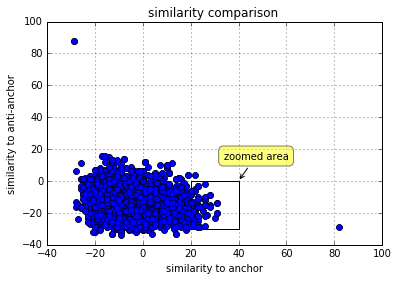

In [64]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots()
ax.plot(sim_scores_anchor, sim_scores_anti_anchor, 'bo')

ax.set(xlabel='similarity to anchor', ylabel='similarity to anti-anchor',\
       title='similarity comparison ')
ax.grid()
#plt.axis([-10,10,-10,10])
#fig.savefig("test.png")
ax.add_patch(
    patches.Rectangle(
        (20, -30), # x,y
        20,        # width
        30,        # height
        fill=False      # remove background
    )
)
plt.annotate(
        "zoomed area",
        xy=(40, 0), xytext=(50, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

Let's zoom in on an area of phosphosites which are very similar to MAP3K11 but dissimilar to our 'anti-anchor'

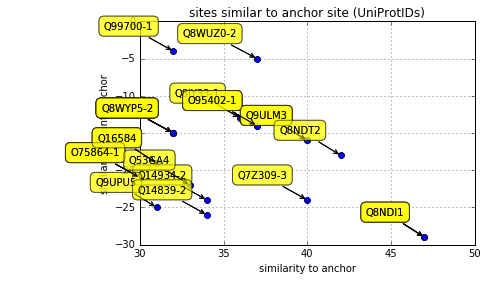

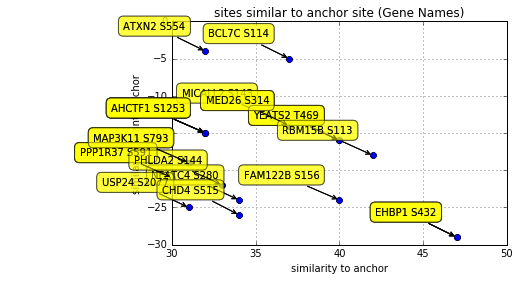

In [5]:
fig, ax = plt.subplots()
ax.plot(sim_scores_anchor, sim_scores_anti_anchor, 'bo')

ax.set(xlabel='similarity to anchor', ylabel='similarity to anti-anchor',\
       title='sites similar to anchor site (UniProtIDs)')
ax.grid()
plt.axis([30,50,-30,0])
#fig.savefig("test.png")

labels = [psite.get_uniprotid() for psite in phosphosites]

for label, x, y in zip(labels, sim_scores_anchor, sim_scores_anti_anchor):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()


fig, ax = plt.subplots()
ax.plot(sim_scores_anchor, sim_scores_anti_anchor, 'bo')

ax.set(xlabel='similarity to anchor', ylabel='similarity to anti-anchor',\
       title='sites similar to anchor site (Gene Names)')
ax.grid()
plt.axis([30,50,-30,0])
#fig.savefig("test.png")

labels = [psite.get_label() for psite in phosphosites]

for label, x, y in zip(labels, sim_scores_anchor, sim_scores_anti_anchor):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()


Grab these as a list

In [6]:
similar_to_anchor_sites = []

indices = range(len(sim_scores_anchor))
for index, anchor, anti in zip(indices, sim_scores_anchor, sim_scores_anti_anchor):
    if anchor > 20 and anchor <50 and anti>-30 and anti<0:
        similar_to_anchor_sites.append(phosphosites[index])
       
    
labels = []
uniprotids = []
for psite in similar_to_anchor_sites:
    if psite.get_label() not in labels:
        labels.append(psite.get_label())
        uniprotids.append(psite.get_uniprotid())
        print psite.get_label()


        
print "All:", len(similar_to_anchor_sites)
print "Unique:",len(labels)
print ''
print "kea input:"
kea_inputs = []
for psite in labels:
    kea_input = psite.split(' ')[0] + '_' + psite.split(' ')[1]
    print kea_input
    kea_inputs.append(kea_input)

print len(kea_inputs)

MAP3K11 S793
CDK12 S681
TBC1D17 S604
ZYX S259
NFATC4 S276
NFATC4 S280
PPP1R37 S591
PPP1R37 S597
CENPF S3007
TRAK2 S780
BCL7C S114
MMACHC S275
NSUN5 T442
ATXN2 S554
C2CD5 S643
ASAP1 S846
EPS8L3 S206
MARVELD2 S116
SNRNP70 S226
MKI67 S584
PLEKHA4 S241
ANKRD17 S1696
NFRKB S1316
NCL S563
SRRM2 S2581
AHCTF1 S1253
PAXX S148
ISL2 S157
EHBP1 S428
EHBP1 S432
EHBP1 S436
FKBP15 S307
BAG3 T285
REPS1 S162
TBC1D10B S678
CHAMP1 S282
MYO18A S160
MYH14 S2024
FAM117B S136
CBLB S525
USP24 S2077
SRRM2 S2121
KIAA1522 S921
RBBP6 S1179
None S2165
RAPGEF6 S1245
RAPGEF6 S1249
MICALL2 S143
FAM114A1 S196
ARHGEF18 S1124
FARP1 S427
RBBP8NL S145
FARP2 S480
PAXX S152
SRRM1 S402
BUD13 S201
MED26 S314
LSM14B S156
MKL1 S454
YEATS2 T469
GPHN S194
SRRM2 S351
SCAF1 S500
MEPCE S217
PHLDA2 S144
CEP89 S40
HSF1 S363
PLEKHA5 S1099
YEATS2 S473
RRP1B S736
MKL2 S932
UBAP2L S454
ANKRD17 S2047
TNRC18 S991
TNRC18 S995
PLEKHA7 S867
ZC3HC1 S359
SHROOM2 S1173
ZBTB7A S511
PI4K2A S47
FAM122B S156
CCNK S324
PLEKHA7 S569
SCRIB S1547
PPFIBP1

KEA says that these three Kinases are upstream of our list of phosphosites: **GSK3B, MAPK14, MAPK8**

We need to dig into the results a bit to see which of our phosphosites are causing the KEA hits:

In [7]:
fp_MK8 = open("MAPK8.txt", 'r')
fp_MK14 = open("MAPK14.txt", 'r')
fp_GSK = open("GSK3B.txt", 'r')

mk8_downstream = fp_MK8.readline().split(', ')
mk14_downstream = fp_MK8.readline().split(', ')
gsk_downstream = fp_MK8.readline().split(', ')

mk8_genes_only = [mk.split('_')[0] for mk in mk8_downstream]
mk14_genes_only = [mk.split('_')[0] for mk in mk14_downstream]
gsk_genes_only = [gsk.split('_')[0] for gsk in gsk_downstream]


for kea_input in kea_inputs:
    #if kea_input == kea_inputs[0]:
    #    print kea_input, mk8_downstream
    if kea_input in mk8_downstream:
        print kea_input, "is downstream of MAPK8"
        
for kea_input in kea_inputs:
    if kea_input in mk14_downstream:
        print kea_input, "is downstream of MAPK14"
        
for kea_input in kea_inputs:
    if kea_input in gsk_downstream:
        print kea_input, "is downstream of GSK3B"

print ""
print "genes only"
for kea_input in kea_inputs:
    if kea_input.split('_')[0] in mk8_genes_only:
        print kea_input.split('_')[0], "is downstream of MAPK8"
        
for kea_input in kea_inputs:
    if kea_input.split('_')[0] in mk14_genes_only:
        print kea_input.split('_')[0], "is downstream of MAPK14"
        
for kea_input in kea_inputs:
    if kea_input.split('_')[0] in gsk_genes_only:
        print kea_input.split('_')[0], "is downstream of GSK3B"

SNRNP70_S226 is downstream of MAPK8
ISL2_S157 is downstream of MAPK8
HSF1_S363 is downstream of MAPK8

genes only
MAP3K11 is downstream of MAPK8
NSUN5 is downstream of MAPK8
SNRNP70 is downstream of MAPK8
SRRM2 is downstream of MAPK8
ISL2 is downstream of MAPK8
SRRM2 is downstream of MAPK8
SRRM2 is downstream of MAPK8
HSF1 is downstream of MAPK8
EPS8L2 is downstream of MAPK8


In [8]:
#from Function import get_function_from_uniprot

#for i, uniprotid in enumerate(uniprotids):
#    print labels[i].split(' ')[0]
#    print get_function_from_uniprot(uniprotid)


In [9]:

#from Function import get_keywords_from_uniprot

#for i, uniprotid in enumerate(uniprotids):
#    print labels[i].split(' ')[0]
#    print get_keywords_from_uniprot(uniprotid)

Let's pick a completely different anchor site and start again.

In [16]:
#for i, psite in enumerate(phosphosites):
#    if "SRC" in u"{}".format(psite.get_genename()):
#        print i, psite.get_genename(), psite.get_residue(), str(psite.get_position())
        
anchor_site = phosphosites[1465]
print anchor_site.get_genename()

sim_scores_anchor = []

for phosphosite in phosphosites:
    try:
        sim_scores_anchor.append(calc_sim_score_simple(anchor_site.get_AA_sequence(), phosphosite.get_AA_sequence()))
    except:
        sim_scores_anchor.append(0)

SRCAP


In [17]:
print min(sim_scores_anchor)

indices_of_mins = [i for i, x in enumerate(sim_scores_anchor) if x == min(sim_scores_anchor)]

print indices_of_mins
print phosphosites[indices_of_mins[0]].get_genename(), phosphosites[indices_of_mins[0]].get_residue(), \
          phosphosites[indices_of_mins[0]].get_position()
print calc_sim_score_simple(anchor_site.get_AA_sequence(), phosphosites[347].get_AA_sequence())

anti_anchor_site = phosphosites[indices_of_mins[0]]
print anti_anchor_site.get_genename()

# Let phosphosites[indices_of_mins[0]] be our second 'anti-anchor' site
sim_scores_anti_anchor = []

for phosphosite in phosphosites:
    try:
        sim_scores_anti_anchor.append(calc_sim_score_simple(anti_anchor_site.get_AA_sequence(), phosphosite.get_AA_sequence()))
    except:
        sim_scores_anti_anchor.append(0)

-29
[507, 817, 5783, 6093]
STK11IP S 403
1
STK11IP


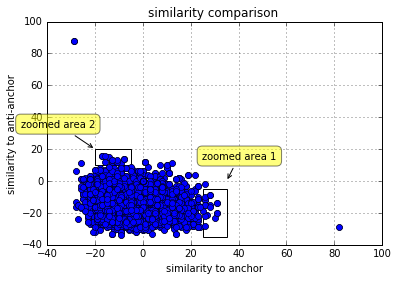

In [47]:
fig, ax = plt.subplots()
ax.plot(sim_scores_anchor, sim_scores_anti_anchor, 'bo')

ax.set(xlabel='similarity to anchor', ylabel='similarity to anti-anchor',\
       title='similarity comparison ')
ax.grid()
#plt.axis([-10,10,-10,10])
#fig.savefig("test.png")
ax.add_patch(
    patches.Rectangle(
        (25, -35), # x,y
        10,        # width
        30,        # height - so box is x 25 to 35, y -35 to -5
        fill=False      # remove background
    )
)
ax.add_patch(
    patches.Rectangle(
        (-20, 10), # x,y
        15,        # width
        10,        # height - so box is x 25 to 35, y -35 to -5
        fill=False      # remove background
    )
)


plt.annotate(
        "zoomed area 1",
        xy=(35, 0), xytext=(50, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
#plt.show()

plt.annotate(
        "zoomed area 2",
        xy=(-20, 20), xytext=(0, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

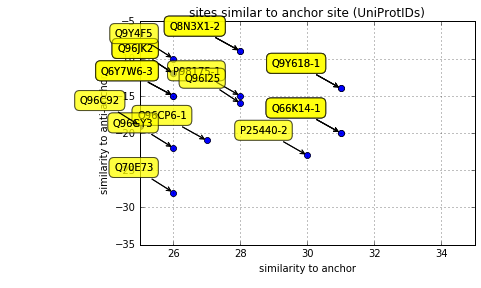

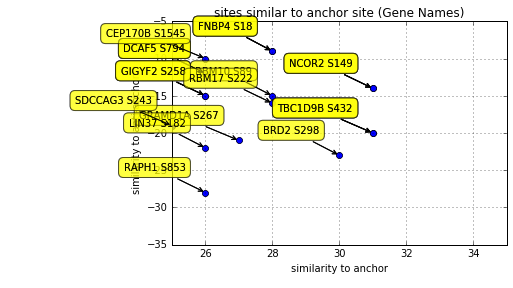

In [61]:
fig, ax = plt.subplots()
ax.plot(sim_scores_anchor, sim_scores_anti_anchor, 'bo')

ax.set(xlabel='similarity to anchor', ylabel='similarity to anti-anchor',\
       title='sites similar to anchor site (UniProtIDs)')
ax.grid()
plt.axis([25,35,-35,-5])
#fig.savefig("test.png")

labels = [psite.get_uniprotid() for psite in phosphosites]

for label, x, y in zip(labels, sim_scores_anchor, sim_scores_anti_anchor):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()


fig, ax = plt.subplots()
ax.plot(sim_scores_anchor, sim_scores_anti_anchor, 'bo')

ax.set(xlabel='similarity to anchor', ylabel='similarity to anti-anchor',\
       title='sites similar to anchor site (Gene Names)')
ax.grid()
plt.axis([25,35,-35,-5])
#fig.savefig("test.png")

labels = [psite.get_label() for psite in phosphosites]

for label, x, y in zip(labels, sim_scores_anchor, sim_scores_anti_anchor):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()

Let's pick a third phosphosite and look at that, we'll pick at random for now

In [30]:
similar_to_anchor_sites = []

indices = range(len(sim_scores_anchor))
for index, anchor, anti in zip(indices, sim_scores_anchor, sim_scores_anti_anchor):
    if anchor > 25 and anchor <35 and anti>-35 and anti<5:
        similar_to_anchor_sites.append(phosphosites[index])
       
    
labels = []
uniprotids = []
for psite in similar_to_anchor_sites:
    if psite.get_label() not in labels:
        labels.append(psite.get_label())
        uniprotids.append(psite.get_uniprotid())
        print psite.get_label()


        
print "All:", len(similar_to_anchor_sites)
print "Unique:",len(labels)
print ''
print "kea input:"
kea_inputs = []
for psite in labels:
    kea_input = psite.split(' ')[0] + '_' + psite.split(' ')[1]
    print kea_input
    kea_inputs.append(kea_input)

print len(kea_inputs)

GRAMD1A S267
DCAF5 S794
RBM10 S89
BRD2 S298
LIN37 S182
SCRIB S1306
GIGYF2 S258
CEP170B S1545
NCOR2 S149
RBM17 S222
FNBP4 S18
TBC1D9B S432
RAPH1 S853
All: 36
Unique: 13

kea input:
GRAMD1A_S267
DCAF5_S794
RBM10_S89
BRD2_S298
LIN37_S182
SCRIB_S1306
GIGYF2_S258
CEP170B_S1545
NCOR2_S149
RBM17_S222
FNBP4_S18
TBC1D9B_S432
RAPH1_S853
13


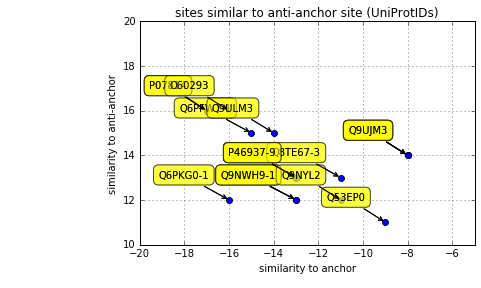

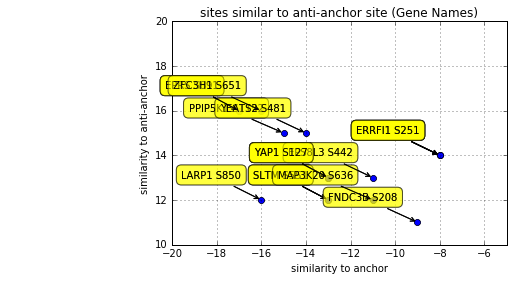

In [52]:
fig, ax = plt.subplots()
ax.plot(sim_scores_anchor, sim_scores_anti_anchor, 'bo')

ax.set(xlabel='similarity to anchor', ylabel='similarity to anti-anchor',\
       title='sites similar to anti-anchor site (UniProtIDs)')
ax.grid()
plt.axis([-20,-5,10,20])
#fig.savefig("test.png")

labels = [psite.get_uniprotid() for psite in phosphosites]

for label, x, y in zip(labels, sim_scores_anchor, sim_scores_anti_anchor):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()


fig, ax = plt.subplots()
ax.plot(sim_scores_anchor, sim_scores_anti_anchor, 'bo')

ax.set(xlabel='similarity to anchor', ylabel='similarity to anti-anchor',\
       title='sites similar to anti-anchor site (Gene Names)')
ax.grid()
plt.axis([-20,-5,10,20])
#fig.savefig("test.png")

labels = [psite.get_label() for psite in phosphosites]

for label, x, y in zip(labels, sim_scores_anchor, sim_scores_anti_anchor):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()

In [56]:
similar_to_anti_anchor_sites = []

indices = range(len(sim_scores_anti_anchor))
for index, anchor, anti in zip(indices, sim_scores_anchor, sim_scores_anti_anchor):
    if anchor > -20 and anchor <-5 and anti>0 and anti<20:
        similar_to_anti_anchor_sites.append(phosphosites[index])
       
    
labels = []
uniprotids = []
for psite in similar_to_anti_anchor_sites:
    if psite.get_label() not in labels:
        labels.append(psite.get_label())
        uniprotids.append(psite.get_uniprotid())
        print psite.get_label()


        
print "All:", len(similar_to_anti_anchor_sites)
print "Unique:",len(labels)
print ''
print "kea input:"
kea_inputs = []
for psite in labels:
    kea_input = psite.split(' ')[0] + '_' + psite.split(' ')[1]
    print kea_input
    kea_inputs.append(kea_input)

print len(kea_inputs)

DDX41 S68
ERRFI1 S251
SENP7 S444
MAP7D1 S273
PACSIN2 S393
CDC42BPA S1773
C19orf24 S120
ZFP91 S82
SNW1 S232
PNPLA2 S404
UBE4B S87
ULK1 T468
ISCU S29
MTOR S2481
RPLP1 S105
CHAF1B T432
AAK1 T606
ATXN2L S32
HNRNPF S107
FAM83H S881
MYL12B S20
PPIP5K1 S1152
TP53BP1 S1764
DLG5 S1263
EPRS S891
SNX1 S39
SLTM S551
None T2328
BAD S99
KLF3 S78
PCM1 S119
SRP72 S621
ZDHHC5 S432
ZNF830 S351
RRP1B S731
LARP1 S850
FOXK1 S428
NCOR2 S2068
ZNF687 S1184
YAP1 S127
FAM117B T149
PCIF1 S140
LSM14B S155
YEATS2 S481
ZNF574 S387
OSBPL8 S807
SLC35C2 S364
RETREG3 S320
AHNAK2 S280
FNDC3B S208
CCDC120 S395
RBM12B S278
TLE3 T334
MED26 S322
EIF5B S182
MAP3K20 S636
NCL T213
ZFC3H1 S651
SSFA2 T867
RAB11FIP5 S395
VPS13D S2434
EPS8L3 S442
DCP1A S522
ARHGEF11 T1501
TRIP10 T302
SHB S310
PAK1 T229
ROCK1 T1334
WASHC2C S284
PALM3 S143
MRGBP S191
GAB2 S147
RAD23B T159
All: 198
Unique: 73

kea input:
DDX41_S68
ERRFI1_S251
SENP7_S444
MAP7D1_S273
PACSIN2_S393
CDC42BPA_S1773
C19orf24_S120
ZFP91_S82
SNW1_S232
PNPLA2_S404
UBE4B_S87
UL

In [57]:
fp_AKT1 = open("AKT1.txt", 'r')

akt1_downstream = fp_AKT1.readline().split(', ')
akt1_genes_only = [mk.split('_')[0] for mk in akt1_downstream]

for kea_input in kea_inputs:
    #if kea_input == kea_inputs[0]:
    #    print kea_input, mk8_downstream
    if kea_input in akt1_downstream:
        print kea_input, "is downstream of AKT1"

print ""
print "genes only"
for kea_input in kea_inputs:
    if kea_input.split('_')[0] in akt1_genes_only:
        print kea_input.split('_')[0], "is downstream of AKT1"

YAP1_S127 is downstream of AKT1

genes only
MTOR is downstream of AKT1
BAD is downstream of AKT1
YAP1 is downstream of AKT1
PAK1 is downstream of AKT1
GAB2 is downstream of AKT1


In [58]:
import random

index3 = random.randint(0,len(phosphosites))

anchor_site_3 = phosphosites[index3]

sim_scores_anchor_3 = []

for phosphosite in phosphosites:
    try:
        sim_scores_anchor_3.append(calc_sim_score_simple(anchor_site_3.get_AA_sequence(), phosphosite.get_AA_sequence()))
    except:
        sim_scores_anchor_3.append(0)

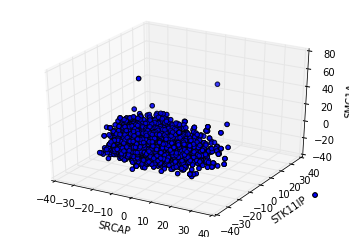

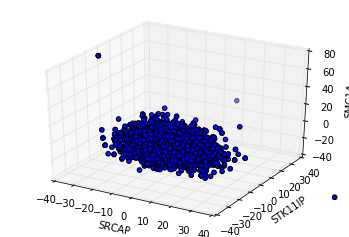

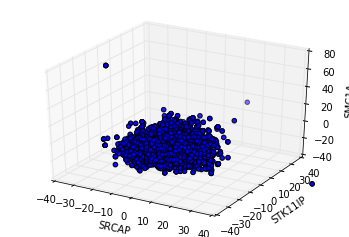

In [59]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sim_scores_anchor, sim_scores_anti_anchor, sim_scores_anchor_3, label='similarity', zdir='z')
ax.axis([-40,40,-40,40])
ax.set(xlabel=anchor_site.get_genename(), ylabel=anti_anchor_site.get_genename(), zlabel=anchor_site_3.get_genename())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sim_scores_anchor, sim_scores_anti_anchor, sim_scores_anchor_3, label='similarity', zdir='y')
ax.axis([-40,40,-40,40])
ax.set(xlabel=anchor_site.get_genename(), ylabel=anti_anchor_site.get_genename(), zlabel=anchor_site_3.get_genename())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sim_scores_anchor, sim_scores_anti_anchor, sim_scores_anchor_3, label='similarity', zdir='x')
ax.axis([-40,40,-40,40])
ax.set(xlabel=anchor_site.get_genename(), ylabel=anti_anchor_site.get_genename(), zlabel=anchor_site_3.get_genename())